In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

pd.set_option("max_columns", 60)

flights = pd.read_csv('csv/flights.csv')
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,,1455,,,1634,,9E,3393,,JFK,DCA,,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,,2200,,,2312,,9E,3525,,LGA,SYR,,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,,1210,,,1330,,MQ,3461,N535MQ,LGA,BNA,,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,,1159,,,1344,,MQ,3572,N511MQ,LGA,CLE,,419,11,59,2013-09-30T11:00:00Z


In [2]:
# On compte le nombre d'aéroports de destination
count_destinations_airport = flights.dest.nunique()
print(count_destinations_airport)

105


In [3]:
# On compte le nombre d'aéroports de départ
count_departures_airport = flights.origin.nunique()
print(count_departures_airport)

3


In [4]:
airports = pd.read_csv('csv/airports.csv')
airlines = pd.read_csv('csv/airlines.csv')
planes = pd.read_csv('csv/planes.csv', index_col='tailnum')
weather = pd.read_csv('csv/weather.csv')
weather_with_3_doublons = pd.read_csv('csv/weather_with_3_doublons.csv')

airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [5]:
# 1) Nombre d'aéroports
total_count_airports = airports.index.nunique()
print(total_count_airports)

1458


In [6]:
# Aéroports qui ne passent pas à l'heure d'été (= no dst)
no_dst_airports = airports['dst'].value_counts()['N']
print(f'Airports which dont use summer time {no_dst_airports}')

# nombre de timezones
nb_timezones = airports.tzone.nunique()
print(f'Number of timzones {nb_timezones}')

Airports which dont use summer time 23
Number of timzones 10


In [7]:
# nombre de compagnies
airlines_count = len(airlines.index)
print(airlines_count)

16


In [8]:
# nombre d'avions
planes_count = len(planes.index)
print(planes_count)

3322


## Nombre de vols annulés

In [9]:
len(flights[flights['dep_time'] == ' '])

8255

## Aeroports de départ le plus empreinté 

In [10]:
flights['origin'].value_counts(ascending=False).head(1)

EWR    120835
Name: origin, dtype: int64

## Aeroports de destination les plus/moins empreintés

In [11]:
flights['dest'].value_counts(ascending = False)\
    .head(10).reset_index()\
    .rename({'index':'faa'}, axis = 1)\
    .merge(airports[['faa', 'name']], how='inner', on='faa')

,faa,dest,name
0,ORD,17283,Chicago Ohare Intl
1,ATL,17215,Hartsfield Jackson Atlanta Intl
2,LAX,16174,Los Angeles Intl
3,BOS,15508,General Edward Lawrence Logan Intl
4,MCO,14082,Orlando Intl
5,CLT,14064,Charlotte Douglas Intl
6,SFO,13331,San Francisco Intl
7,FLL,12055,Fort Lauderdale Hollywood Intl
8,MIA,11728,Miami Intl
9,DCA,9705,Ronald Reagan Washington Natl


In [12]:
dests = flights['dest'].value_counts(ascending = False).head(10)
dests_less_used = flights['dest'].value_counts(ascending = True).head(10)

In [13]:
dests = dests.reset_index()
dests_less_used = dests_less_used.reset_index()
dests.columns =['faa' , 'dest']
dests_less_used.columns = ['faa', 'dest']

In [14]:
dest_airports_most_used = pd.merge(dests, airports, how='inner', on='faa')
dest_airports_less_used = pd.merge(dests_less_used, airports, how='inner', on='faa')

In [15]:
dest_airports_most_used['Pourcentage (%)'] = (dest_airports_most_used["dest"]/flights["dest"].value_counts().sum())* 100
dest_airports_less_used['Pourcentage (%)'] = (dest_airports_less_used["dest"]/flights["dest"].value_counts().sum())* 100

### Les moins empreintés

In [16]:
dest_airports_less_used[['faa','name', 'Pourcentage (%)']]

,faa,name,Pourcentage (%)
0,LEX,Blue Grass,0.000297
1,LGA,La Guardia,0.000297
2,ANC,Ted Stevens Anchorage Intl,0.002375
3,SBN,South Bend Rgnl,0.002969
4,MTJ,Montrose Regional Airport,0.004454
5,HDN,Yampa Valley,0.004454
6,EYW,Key West Intl,0.005048
7,PSP,Palm Springs Intl,0.005642
8,JAC,Jackson Hole Airport,0.007423
9,BZN,Gallatin Field,0.010690


### Les plus empreintés

In [17]:
dest_airports_most_used

,faa,dest,name,lat,lon,alt,tz,dst,tzone,Pourcentage (%)
0,ORD,17283,Chicago Ohare Intl,41.978603,-87.904842,668,-6,A,America/Chicago,5.131898
1,ATL,17215,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026,-5,A,America/New_York,5.111706
2,LAX,16174,Los Angeles Intl,33.942536,-118.408075,126,-8,A,America/Los_Angeles,4.802599
3,BOS,15508,General Edward Lawrence Logan Intl,42.364347,-71.005181,19,-5,A,America/New_York,4.604841
4,MCO,14082,Orlando Intl,28.429394,-81.308994,96,-5,A,America/New_York,4.181414
5,CLT,14064,Charlotte Douglas Intl,35.214000,-80.943139,748,-5,A,America/New_York,4.176070
6,SFO,13331,San Francisco Intl,37.618972,-122.374889,13,-8,A,America/Los_Angeles,3.958417
7,FLL,12055,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9,-5,A,America/New_York,3.579531
8,MIA,11728,Miami Intl,25.793250,-80.290556,8,-5,A,America/New_York,3.482433
9,DCA,9705,Ronald Reagan Washington Natl,38.852083,-77.037722,15,-5,A,America/New_York,2.881737


In [18]:
planes_most_used = flights['tailnum'].value_counts(ascending = False).head(10)
planes_less_used = flights['tailnum'].value_counts(ascending = True).head(10)
planes_most_used

          2512
N725MQ     575
N722MQ     513
N723MQ     507
N711MQ     486
N713MQ     483
N258JB     427
N298JB     407
N353JB     404
N351JB     402
Name: tailnum, dtype: int64

In [19]:
planes_most_used = planes_most_used.reset_index()
planes_less_used = planes_less_used.reset_index()
planes_most_used.columns = ['tailnum', 'count flights']
planes_less_used.columns = ['tailnum', 'count flights']

In [20]:
planes_most_used = pd.merge(planes_most_used, planes[['type', 'manufacturer', 'model']], how='left', on='tailnum')
planes_less_used = pd.merge(planes_less_used, planes[['type', 'manufacturer', 'model']], how='left', on='tailnum')

In [21]:
# 10 avions les plus utilisés
planes_most_used

,tailnum,count flights,type,manufacturer,model
0,,2512,NaN,NaN,NaN
1,N725MQ,575,NaN,NaN,NaN
2,N722MQ,513,NaN,NaN,NaN
3,N723MQ,507,NaN,NaN,NaN
4,N711MQ,486,Fixed wing multi engine,GULFSTREAM AEROSPACE,G1159B
5,N713MQ,483,NaN,NaN,NaN
6,N258JB,427,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW
7,N298JB,407,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW
8,N353JB,404,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW
9,N351JB,402,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW


In [22]:
# 10 avions les moins utilisés
planes_less_used

,tailnum,count flights,type,manufacturer,model
0,N344SW,1,Fixed wing multi engine,BOEING,737-3H4
1,N641UA,1,Fixed wing multi engine,BOEING,767-322
2,N622AW,1,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-231
3,N5FCAA,1,NaN,NaN,NaN
4,N7BKAA,1,NaN,NaN,NaN
5,N904DA,1,Fixed wing multi engine,MCDONNELL DOUGLAS,MD-90-30
6,N653UA,1,Fixed wing multi engine,BOEING,767-322
7,N57016,1,Fixed wing multi engine,BOEING,777-224
8,N785SK,1,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10
9,N693CA,1,Fixed wing multi engine,BOMBARDIER INC,CL-600-2D24


### 3 -

In [23]:
flightsbycarrier_dest= flights.groupby("carrier")["dest"].count()
flightsbycarrier_dest

carrier
9E    18460
AA    32729
AS      714
B6    54635
DL    48110
EV    54173
F9      685
FL     3260
HA      342
MQ    26397
OO       32
UA    58665
US    20536
VX     5162
WN    12275
YV      601
Name: dest, dtype: int64

In [24]:
nombre_destination_par_compagnie=pd.merge(flightsbycarrier_dest, airlines, how='left', on='carrier')
nombre_destination_par_compagnie

,carrier,dest,name
0,9E,18460,Endeavor Air Inc.
1,AA,32729,American Airlines Inc.
2,AS,714,Alaska Airlines Inc.
3,B6,54635,JetBlue Airways
4,DL,48110,Delta Air Lines Inc.
5,EV,54173,ExpressJet Airlines Inc.
6,F9,685,Frontier Airlines Inc.
7,FL,3260,AirTran Airways Corporation
8,HA,342,Hawaiian Airlines Inc.
9,MQ,26397,Envoy Air


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Endeavor Air Inc.'),
  Text(1, 0, 'American Airlines Inc.'),
  Text(2, 0, 'Alaska Airlines Inc.'),
  Text(3, 0, 'JetBlue Airways'),
  Text(4, 0, 'Delta Air Lines Inc.'),
  Text(5, 0, 'ExpressJet Airlines Inc.'),
  Text(6, 0, 'Frontier Airlines Inc.'),
  Text(7, 0, 'AirTran Airways Corporation'),
  Text(8, 0, 'Hawaiian Airlines Inc.'),
  Text(9, 0, 'Envoy Air'),
  Text(10, 0, 'SkyWest Airlines Inc.'),
  Text(11, 0, 'United Air Lines Inc.'),
  Text(12, 0, 'US Airways Inc.'),
  Text(13, 0, 'Virgin America'),
  Text(14, 0, 'Southwest Airlines Co.'),
  Text(15, 0, 'Mesa Airlines Inc.')])

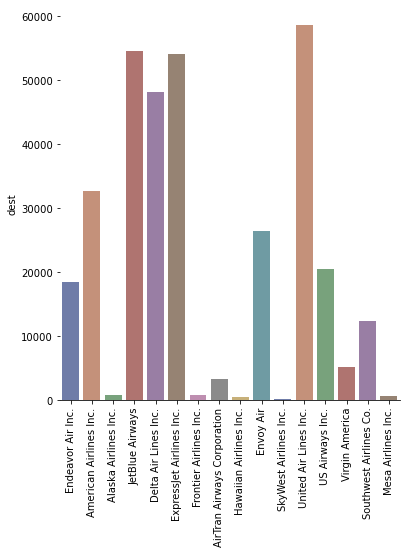

In [25]:
g = sb.catplot(data=nombre_destination_par_compagnie, kind="bar", x="name", y="dest", ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "dest")
plt.xticks(rotation='vertical')

In [26]:
flightsbycarrier_origin= flights.groupby(["carrier","origin"], as_index= True)['origin'].count().reset_index(name="number of flights")


flightsbycarrier_origin

,carrier,origin,number of flights
0,9E,EWR,1268
1,9E,JFK,14651
2,9E,LGA,2541
3,AA,EWR,3487
4,AA,JFK,13783
5,AA,LGA,15459
6,AS,EWR,714
7,B6,EWR,6557
8,B6,JFK,42076
9,B6,LGA,6002


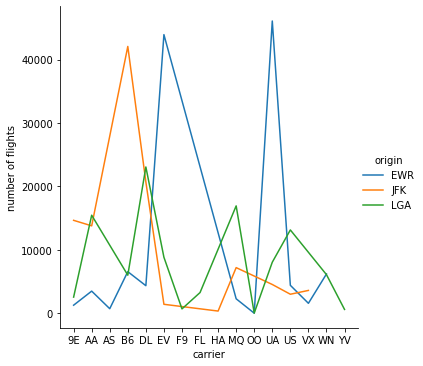

In [27]:
sb.relplot(data=flightsbycarrier_origin, x="carrier", y="number of flights", hue="origin", kind="line")

### 4 - Trouver tous les vols ayant atterri à Houston (IAH ou HOU)

In [28]:
flights[(flights.dest=='IAH')].count()

year              7198
month             7198
day               7198
dep_time          7198
sched_dep_time    7198
dep_delay         7198
arr_time          7198
sched_arr_time    7198
arr_delay         7198
carrier           7198
flight            7198
tailnum           7198
origin            7198
dest              7198
air_time          7198
distance          7198
hour              7198
minute            7198
time_hour         7198
dtype: int64

In [29]:
flights[(flights.dest=='HOU')].count()

year              2115
month             2115
day               2115
dep_time          2115
sched_dep_time    2115
dep_delay         2115
arr_time          2115
sched_arr_time    2115
arr_delay         2115
carrier           2115
flight            2115
tailnum           2115
origin            2115
dest              2115
air_time          2115
distance          2115
hour              2115
minute            2115
time_hour         2115
dtype: int64

In [30]:
## A REVOIR
flights_houston = flights[(flights.dest=='IAH')] + flights[(flights.dest=='HOU')]
flights_houston.shape[0]

9313

In [31]:
#Combien de vols partent de NYC airports vers Seattle
flights_nyc=flights[flights.dest=='SEA']
flights_nyc.shape[0]

3923

In [32]:
flights_nyc=flights[flights.dest=='SEA']
print(len(flights_nyc.carrier.unique()))
print(flights_nyc.carrier.unique())

5
['AS' 'DL' 'UA' 'B6' 'AA']


In [33]:
# combien d’avions desservent cette destination
print(len(flights_nyc.tailnum.unique()))

936


### 5 - 

In [34]:
origin_per_flight = flights.groupby(['dest'])['flight'].nunique()
origin_per_flight.sort_values(axis=0 , ascending=False)
origin_per_flight = flights.groupby(['dest'])['flight'].nunique().reset_index(name='NombreVols')

In [35]:
airports.reset_index()
airports_renamed = airports.rename(columns = {'faa':'dest'})
res = pd.merge(origin_per_flight, airports_renamed, how='left', on='dest')
res = res[['dest', 'NombreVols', 'name']]
res.head(10)

,dest,NombreVols,name
0,ABQ,2,Albuquerque International Sunport
1,ACK,4,Nantucket Mem
2,ALB,42,Albany Intl
3,ANC,1,Ted Stevens Anchorage Intl
4,ATL,300,Hartsfield Jackson Atlanta Intl
5,AUS,113,Austin Bergstrom Intl
6,AVL,10,Asheville Regional Airport
7,BDL,34,Bradley Intl
8,BGR,16,Bangor Intl
9,BHM,4,Birmingham Intl


In [36]:
seeked_values = flights.groupby(['dest', 'origin', 'carrier', 'flight'])['flight'].unique()\
    .reset_index(name='nbFlights')
rzearz = seeked_values.drop('nbFlights', axis='columns')
rzearz
join_dest = pd.merge(airports.rename(columns={ 'faa': 'dest'}), rzearz, how='inner', on='dest')\
    .rename(columns={'name':'DestinationName'})
join_dest
# pd.merge(join_origin, join_dest, how='inner', on="origin")

,dest,DestinationName,lat,lon,alt,tz,dst,tzone,origin,carrier,flight
0,ABQ,Albuquerque International Sunport,35.040222,-106.609194,5355,-7,A,America/Denver,JFK,B6,65
1,ABQ,Albuquerque International Sunport,35.040222,-106.609194,5355,-7,A,America/Denver,JFK,B6,1505
2,ACK,Nantucket Mem,41.253053,-70.060181,48,-5,A,America/New_York,JFK,B6,1191
3,ACK,Nantucket Mem,41.253053,-70.060181,48,-5,A,America/New_York,JFK,B6,1195
4,ACK,Nantucket Mem,41.253053,-70.060181,48,-5,A,America/New_York,JFK,B6,1291
...,...,...,...,...,...,...,...,...,...,...,...
11982,XNA,NW Arkansas Regional,36.281869,-94.306811,1287,-6,A,America/Chicago,LGA,MQ,3553
11983,XNA,NW Arkansas Regional,36.281869,-94.306811,1287,-6,A,America/Chicago,LGA,MQ,3713
11984,XNA,NW Arkansas Regional,36.281869,-94.306811,1287,-6,A,America/Chicago,LGA,MQ,4413
11985,XNA,NW Arkansas Regional,36.281869,-94.306811,1287,-6,A,America/Chicago,LGA,MQ,4525


In [37]:
join_dest.drop(['lat', 'lon', 'alt', 'tz','dst', 'tzone'], axis='columns', inplace=True)

In [38]:
join_origin = pd.merge(join_dest, airports.rename(columns={ 'faa': 'origin'}), how='inner', on='origin')\
    .rename(columns={'name':'OriginName'})
join_origin.drop(['lat', 'lon', 'alt', 'tz','dst', 'tzone'], axis='columns', inplace=True)
pd.merge(join_origin, airlines, how='inner', on='carrier')\
    .rename(columns={'name':'AirlineName'})\
    .sort_values('DestinationName')

,dest,DestinationName,origin,carrier,flight,OriginName,AirlineName
11934,CAK,Akron Canton Regional Airport,LGA,FL,237,La Guardia,AirTran Airways Corporation
11939,CAK,Akron Canton Regional Airport,LGA,FL,357,La Guardia,AirTran Airways Corporation
11940,CAK,Akron Canton Regional Airport,LGA,FL,485,La Guardia,AirTran Airways Corporation
11941,CAK,Akron Canton Regional Airport,LGA,FL,721,La Guardia,AirTran Airways Corporation
11942,CAK,Akron Canton Regional Airport,LGA,FL,742,La Guardia,AirTran Airways Corporation
...,...,...,...,...,...,...,...
4366,ILM,Wilmington Intl,LGA,EV,5029,La Guardia,ExpressJet Airlines Inc.
4365,ILM,Wilmington Intl,LGA,EV,4885,La Guardia,ExpressJet Airlines Inc.
6796,HDN,Yampa Valley,EWR,UA,355,Newark Liberty Intl,United Air Lines Inc.
6797,HDN,Yampa Valley,EWR,UA,441,Newark Liberty Intl,United Air Lines Inc.


### 6 - nombres d'aéroports de destination & départ

In [39]:
origin_per_airline = flights.groupby(['carrier'])['origin'].nunique()
dest_per_airline = flights.groupby(['carrier'])['dest'].nunique()
res = pd.merge(dest_per_airline, origin_per_airline, how='left', on='carrier')
res = pd.merge(res, airlines, how='inner', on='carrier')
res

,carrier,dest,origin,name
0,9E,49,3,Endeavor Air Inc.
1,AA,19,3,American Airlines Inc.
2,AS,1,1,Alaska Airlines Inc.
3,B6,42,3,JetBlue Airways
4,DL,40,3,Delta Air Lines Inc.
5,EV,61,3,ExpressJet Airlines Inc.
6,F9,1,1,Frontier Airlines Inc.
7,FL,3,1,AirTran Airways Corporation
8,HA,1,1,Hawaiian Airlines Inc.
9,MQ,20,3,Envoy Air


In [40]:
# compagnies qui n'ont pas tous les aéroports d'origine
print(res[res.origin < flights['origin'].nunique()])

   carrier  dest  origin                         name
2       AS     1       1         Alaska Airlines Inc.
6       F9     1       1       Frontier Airlines Inc.
7       FL     3       1  AirTran Airways Corporation
8       HA     1       1       Hawaiian Airlines Inc.
10      OO     5       2        SkyWest Airlines Inc.
13      VX     5       2               Virgin America
14      WN    11       2       Southwest Airlines Co.
15      YV     3       1           Mesa Airlines Inc.


In [41]:
# compagnies qui desservent toutes les destinations (aucune)
print(res[res.origin == flights['dest'].nunique()])

Empty DataFrame
Columns: [carrier, dest, origin, name]
Index: []


### 7 - Nombre de destinations exclusives à une compagnie

In [42]:
airline_per_dest = flights.groupby(['dest'])['carrier'].unique().reset_index(name='airlines')
airline_per_dest[airline_per_dest['airlines'].str.len() == 1].shape[0]

29

### 8 -

In [43]:
airlines
airlines_in = ['DL','UA','AA']
filtered_df = flights[flights.carrier.isin(airlines_in)]
filtered_df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T05:00:00Z
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T06:00:00Z
5,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T05:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336737,2013,9,30,2105,2106,-1,2329,2354,-25,UA,475,N477UA,EWR,IAH,175,1400,21,6,2013-09-30T21:00:00Z
336744,2013,9,30,2121,2100,21,2349,14,-25,DL,2363,N193DN,JFK,LAX,296,2475,21,0,2013-09-30T21:00:00Z
336751,2013,9,30,2140,2140,0,10,40,-30,AA,185,N335AA,JFK,LAX,298,2475,21,40,2013-09-30T21:00:00Z
336755,2013,9,30,2149,2156,-7,2245,2308,-23,UA,523,N813UA,EWR,BOS,37,200,21,56,2013-09-30T21:00:00Z


In [44]:
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230,10.357019999999999,11.918651475599997,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230,13.809359999999998,15.891535300799996,0.0,1013,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230,12.658579999999999,14.567240692399997,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23,54.51,230,13.809359999999998,15.891535300799996,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240,14.960139999999999,17.215829909199996,0.0,1012.8,10.0,2013-01-01T04:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,35.96,19.94,51.78,340,13.809359999999998,15.891535300799996,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26126,LGA,2013,12,30,20,33.98,17.06,49.51,330,17.261699999999998,19.864419125999994,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26127,LGA,2013,12,30,21,32,15.08,49.19,340,14.960139999999999,17.215829909199996,0.0,1019.5,10.0,2013-12-30T21:00:00Z
26128,LGA,2013,12,30,22,30.92,12.92,46.74,320,17.261699999999998,19.864419125999994,0.0,1019.9,10.0,2013-12-30T22:00:00Z


In [45]:
weather_with_3_doublons

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30T21:00:00Z
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30T22:00:00Z
